In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters ()

In [8]:
df1 = pd.read_csv("/Users/nicolasdemuynck/Documents/Datasets/Stockpred/stocks/A.csv" , index_col='Date')
df_A = pd.read_csv("/Users/nicolasdemuynck/Documents/Datasets/Stockpred/stocks/A.csv", index_col='Date')
df2 = pd.read_csv("/Users/nicolasdemuynck/Documents/Datasets/Stockpred/stocks/AA.csv" , index_col='Date')
df_B = pd.read_csv("/Users/nicolasdemuynck/Documents/Datasets/Stockpred/stocks/AA.csv", index_col='Date')
del df_A['Adj Close']
del df_A['Volume']
del df_B['Adj Close']
del df_B['Volume']

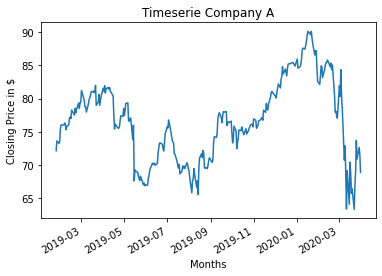

In [9]:
df_A.index
df_A.index = pd.to_datetime(df_A.index)
df_A_smaller = df_A.Close[-300:]
A_close_values = df_A_smaller.plot()
A_close_values.set_xlabel ('Months')
A_close_values.set_ylabel ('Closing Price in $')
plt.title('Timeserie Company A')
plt.show()

Text(0.5, 1.0, 'Timeserie company A')

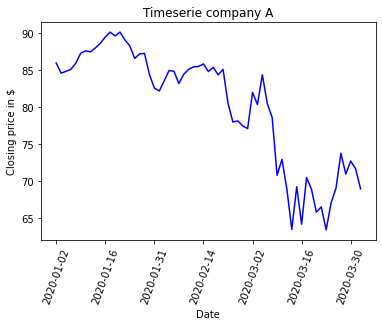

In [10]:
dfA_close2020 = df1.Close[-63:]
dfA_close2020
ax1 = dfA_close2020.plot (color = 'blue')
ax1.set_xlabel ('Date')
ax1.set_ylabel ('Closing price in $')
plt.xticks(rotation=70)
plt.title ('Timeserie company A')

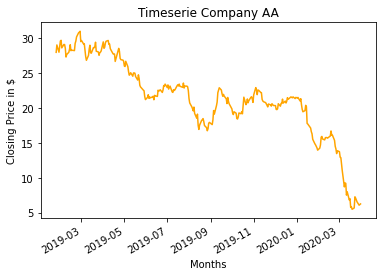

In [13]:
df_B.index = pd.to_datetime(df_B.index)
df_B_smaller = df_B.Close[-300:]
B_close_values = df_B_smaller.plot(color ='orange')
B_close_values.set_xlabel ('Months')
B_close_values.set_ylabel ('Closing Price in $')
plt.title('Timeserie Company AA')
plt.show ()

Text(0.5, 1.0, 'Timeserie company AA')

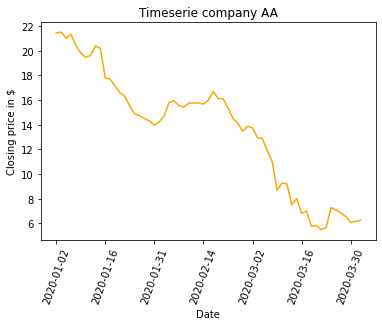

In [15]:
dfAA_close2020 = df2.Close[-63:]
dfAA_close2020
ax1 = dfAA_close2020.plot (color = 'orange')
ax1.set_xlabel ('Date')
ax1.set_ylabel ('Closing price in $')
plt.xticks(rotation=70)
plt.title ('Timeserie company AA')

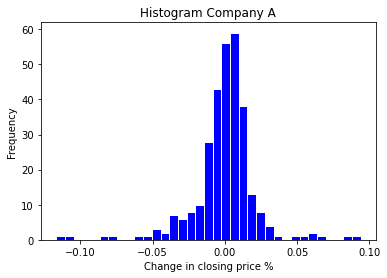

In [16]:
pct_A = np.log(df_A_smaller).diff ()
pct_A.head ()
pct_B = np.log(df_B_smaller).diff ()
pct_B.head ()
pct_A.dropna (inplace=True)
pct_B.dropna (inplace=True)
plt.hist(pct_A, bins=35, color = 'b', edgecolor='w')
plt.title('Histogram Company A')
plt.xlabel('Change in closing price %')
plt.ylabel('Frequency')
plt.show ()

Text(0, 0.5, 'Frequency')

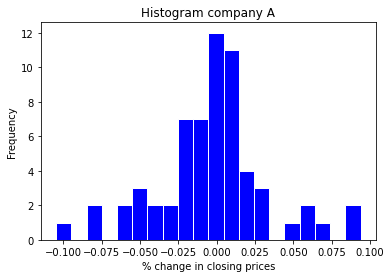

In [17]:
pct_change1 = np.log(dfA_close2020).diff ()
pct_change1.head ()
pct_change2 = np.log(dfAA_close2020).diff ()
pct_change2.head ()
pct_change1.dropna (inplace=True)
pct_change2.dropna (inplace=True)
plt.hist(pct_change1, bins=20, color = 'b', edgecolor='w')
plt.title ('Histogram company A')
plt.xlabel('% change in closing prices')
plt.ylabel('Frequency')

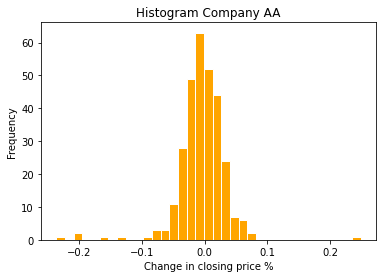

In [19]:
plt.hist(pct_B, bins=35, color = 'orange', edgecolor='w')
plt.title('Histogram Company AA')
plt.xlabel('Change in closing price %')
plt.ylabel('Frequency')
plt.show ()

Text(0, 0.5, 'Frequency')

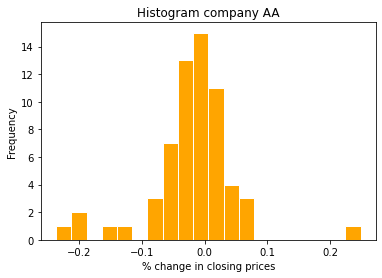

In [20]:
plt.hist(pct_change2, bins=20, color = 'orange', edgecolor='w')
plt.title ('Histogram company AA')
plt.xlabel('% change in closing prices')
plt.ylabel('Frequency')

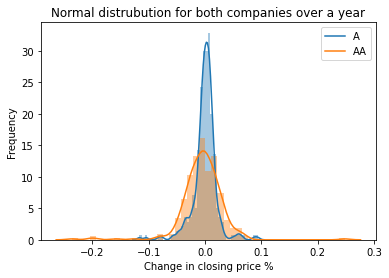

In [21]:
sns.distplot(pct_A, kde_kws={'label': 'A'})
sns.distplot(pct_B, kde_kws={'label': 'AA'})
plt.title('Normal distrubution for both companies over a year')
plt.xlabel('Change in closing price %')
plt.ylabel('Frequency')
plt.show ()

Text(0, 0.5, 'Frequency')

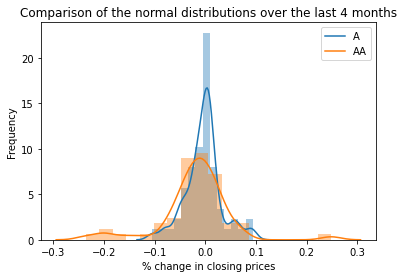

In [33]:
sns.distplot(pct_change1, kde_kws={'label': 'A'})
sns.distplot(pct_change2, kde_kws={'label': 'AA'})
plt.title ('Comparison of the normal distributions over the last 4 months')
plt.xlabel('% change in closing prices')
plt.ylabel('Frequency')

In [24]:
dfA_B = pd.merge(pct_A, pct_B, on='Date', how='left')
Both = dfA_B.rename(columns = {'Close_x':'Company A','Close_y':'Company B'})

pct_change_old=pd.merge(pct_change1, pct_change2, on='Date', how='left')
pct_change = pct_change_old.rename(columns={'Close_x': 'Close_A', 'Close_y': 'Close_AA'})

Text(0.5, 1.0, 'Correlation between companies over a year')

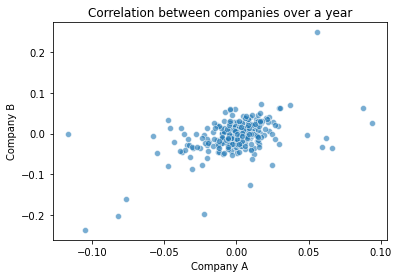

In [34]:
sns.scatterplot(Both['Company A'],Both['Company B'], alpha = 0.6)
plt.title ('Correlation between companies over a year')

Text(0.5, 1.0, 'Correlation between companies over the last 4 months')

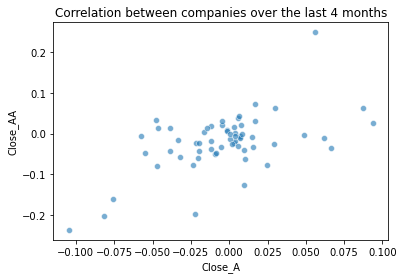

In [35]:
sns.scatterplot(pct_change['Close_A'], pct_change['Close_AA'], alpha = 0.6)
plt.title ('Correlation between companies over the last 4 months')

In [29]:
Both.corr()

,Company A,Company B
Company A,1.000000,0.480741
Company B,0.480741,1.000000


In [30]:
pct_change.corr ()

,Close_A,Close_AA
Close_A,1.000000,0.557938
Close_AA,0.557938,1.000000


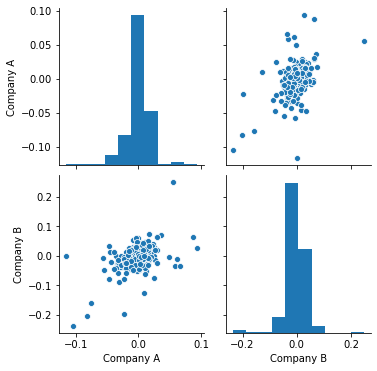

In [31]:
sns.pairplot(Both)

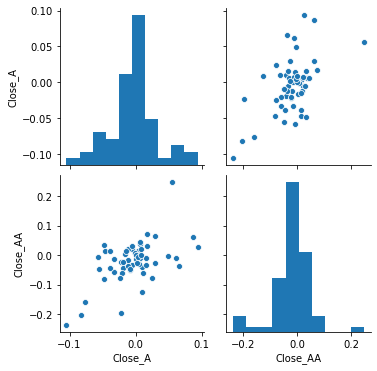

In [32]:
sns.pairplot(pct_change)